In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter("ignore")

In [2]:
df= pd.read_csv("House Price Prediction Dataset.csv")
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


**BUSINESS PROBLEM**

- "The real estate company wants to segment the housing market to better understand different types of            properties in the dataset.
- By grouping houses with similar characteristics together using clustering, the company can create market       profiles (e.g., budget-friendly homes, mid-range family houses, high-end luxury properties).
- These insights will help in marketing strategies, investment planning, and tailored customer offerings."

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [4]:
df.shape #check shape

(2000, 10)

# Data Preprocessing

In [5]:
# drop unnessary column 
df=df.drop(columns=["Id","Price"],axis=1)  

**encoding categorical column**

In [6]:
df["Garage"].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df['Garage'] = df['Garage'].map({'Yes': 1, 'No': 0})  #encode the garege data yes=1 and No =2

In [8]:
df["Condition"].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [9]:
condition_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}
df['Condition'] = df['Condition'].map(condition_map)


In [10]:
df["Location"].unique()  

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [11]:
location_map = {
    'Downtown':1,
    'Suburban':2,
       'Urban':3,
       'Rural':4
}
df["Loacation"]= df["Location"].map(location_map)

In [12]:
# get dummy variable
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [13]:
# drop the older location column
df = df.drop(['Loacation'], axis=1)

In [14]:
# check null value 
df.isnull().sum()

Area                 0
Bedrooms             0
Bathrooms            0
Floors               0
YearBuilt            0
Condition            0
Garage               0
Location_Rural       0
Location_Suburban    0
Location_Urban       0
dtype: int64

In [15]:
# Convert all boolean columns to 0 and 1
# Because clustering (like KMeans) works with numbers only, not True/False values
df['Location_Rural'] = df['Location_Rural'].astype(int)
df['Location_Suburban'] = df['Location_Suburban'].astype(int)
df['Location_Urban'] = df['Location_Urban'].astype(int)


In [16]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Location_Rural,Location_Suburban,Location_Urban
0,1360,5,4,3,1970,3,0,0,0,0
1,4272,5,4,3,1958,3,0,0,0,0
2,3592,2,2,3,1938,2,0,0,0,0
3,966,4,2,2,1902,1,1,0,1,0
4,4926,1,4,2,1975,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,0,0,1,0
1996,3046,5,2,1,2019,0,1,0,1,0
1997,1062,5,1,2,1903,0,0,1,0,0
1998,4062,3,1,2,1936,3,1,0,0,1


# feature selection

In [17]:
from sklearn.preprocessing import StandardScaler

features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Condition', 'Garage', 
            'Location_Rural', 'Location_Suburban', 'Location_Urban']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])


# Find k value (using elbow method)

In [18]:
from sklearn.cluster import KMeans
wcss = []  # WCSS = Within-Cluster Sum of Squares

# Try K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

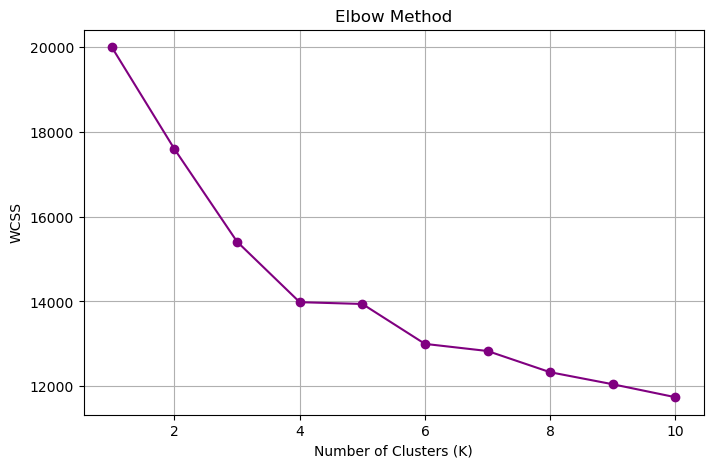

In [19]:
# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# K-means clustring

In [20]:
# Let's say elbow se best K = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster to original data
df['Cluster'] = clusters

# PCA vishualization

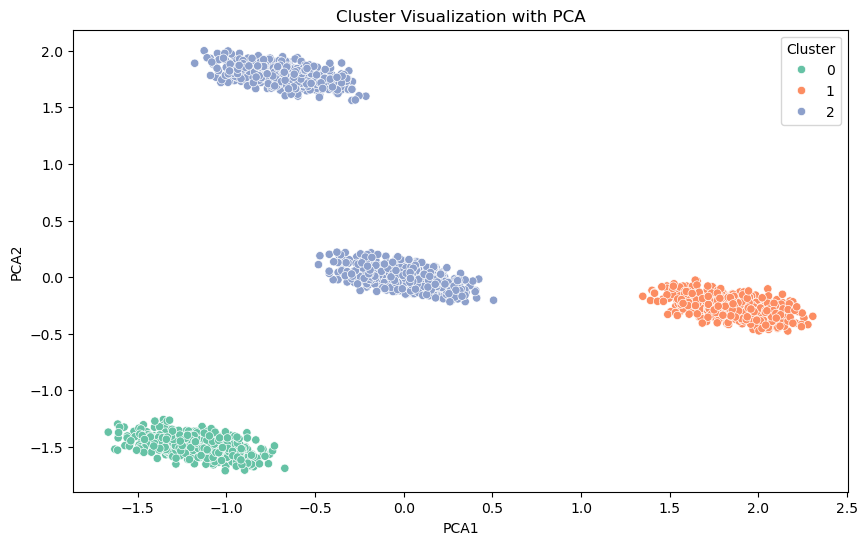

In [21]:
# PCA(principal component analysis) for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # reduce the dataset 10 dimention to 2 dimention

#fit :Learns the directions of maximum variance (principal components).
#transform :Projects  high-dimensional data (10 features) onto the top 2 directions (PCA1, PCA2).
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0] # first principal component (X-axis in plot)
df['PCA2'] = pca_data[:, 1] # second principal component (Y-axis in plot)

plt.figure(figsize=(10, 6)) #size of figure
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2') #sctterplot
plt.title("Cluster Visualization with PCA") #title
plt.show()


**observations (1) :-**

**Why use pca here**

- Your dataset has 10 features (columns) after scaling.

- That’s hard to visualize in 10D space.

- PCA helps reduce these 10 dimensions to just 2, while keeping as much important information (variance) as possible.


**obervation(2)**

- Cluster 0:- may represent **affordable suburban homes.**

- Cluster 1:- might consist of **modern urban apartments.**

- Cluster 2:- could group **luxury downtown villas.**

In [22]:
df.groupby('Cluster').mean()


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Location_Rural,Location_Suburban,Location_Urban,PCA1,PCA2
Cluster,,,,,,,,,,,,
0,2794.020704,2.977226,2.550725,1.979296,1961.151139,1.480331,0.505176,0.000000,1.0,0.0,-1.183764,-1.484362
1,2786.232990,3.068041,2.538144,2.014433,1959.550515,1.445361,0.472165,0.000000,0.0,1.0,1.860962,-0.266242
2,2782.542636,2.985465,2.560078,1.990310,1962.474806,1.511628,0.473837,0.459302,0.0,0.0,-0.320551,0.819840


**observation (2) :-**

**df.groupby('Cluster').mean()**

- This tells you the average values of features in each cluster – useful to describe:
    - Budget homes

    - Luxury homes

    - Mid-size family homes, etc.


In [26]:
df.to_csv("Clustered_Housing_Data.csv", index=False)